# **Analyzing Product Sales Strategy**

## 1. Import modules and libraries

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno
sns.set_style("darkgrid")

## 2. Initial exploration

In [76]:
# Import dataset
from google.colab import files
uploaded = files.upload()

Saving product_sales.csv to product_sales (1).csv


In [77]:
# Read data into df
df = pd.read_csv('product_sales.csv')
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


The column `revenue` contains missing values. All columns are in the expected Dtype

In [79]:
df.shape

(15000, 8)

In [80]:
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [81]:
df['sales_method'].value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

There are value inconsistencies in the column `sales_method`.

In [82]:
df['state'].value_counts()

California        1872
Texas             1187
New York           965
Florida            904
Illinois           617
Pennsylvania       598
Ohio               566
Michigan           498
Georgia            489
North Carolina     459
New Jersey         434
Virginia           372
Indiana            354
Tennessee          340
Washington         335
Arizona            321
Missouri           311
Massachusetts      294
Maryland           263
Wisconsin          253
Minnesota          245
Colorado           230
Louisiana          230
Oregon             229
South Carolina     224
Alabama            214
Kentucky           213
Oklahoma           196
Connecticut        179
Iowa               165
Kansas             142
Mississippi        139
Arkansas           132
Utah               124
Nevada             102
Nebraska            91
West Virginia       85
New Mexico          84
Hawaii              72
Maine               63
Idaho               62
New Hampshire       53
Montana             45
Rhode Islan

In [83]:
len(df['state'].value_counts())

50

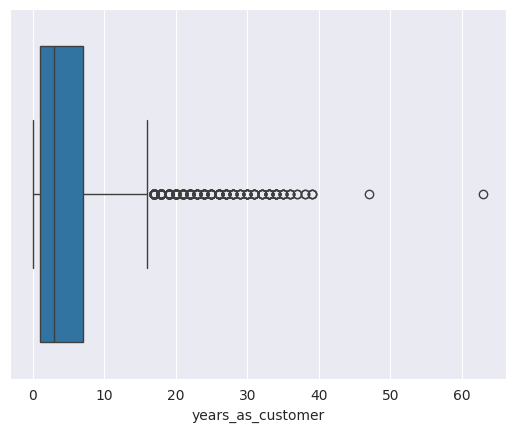

In [84]:
# Visualize the distribution of values in years_as_customer column
sns.boxplot(x='years_as_customer', data=df)
plt.show()

In [85]:
2024 - 1984

40

The company **Pen and Printers** was founded in 1984, assuming the new products line were deployed in 2024, the oldest customer year should be **40**. There appear to be **2** out of range values in this column.

## 3. Data Validation
In this section I addressed the errors in each column


### Sales method

In [86]:
# Replace inconsistent values
df['sales_method'] = df['sales_method'].str.replace('email', 'Email')
df['sales_method'] = df['sales_method'].str.replace('em', 'Email')
df['sales_method'] = df['sales_method'].str.replace('c', 'C')
df['sales_method'].value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

### Revenue

In [87]:
df['revenue'].isna().sum()

1074

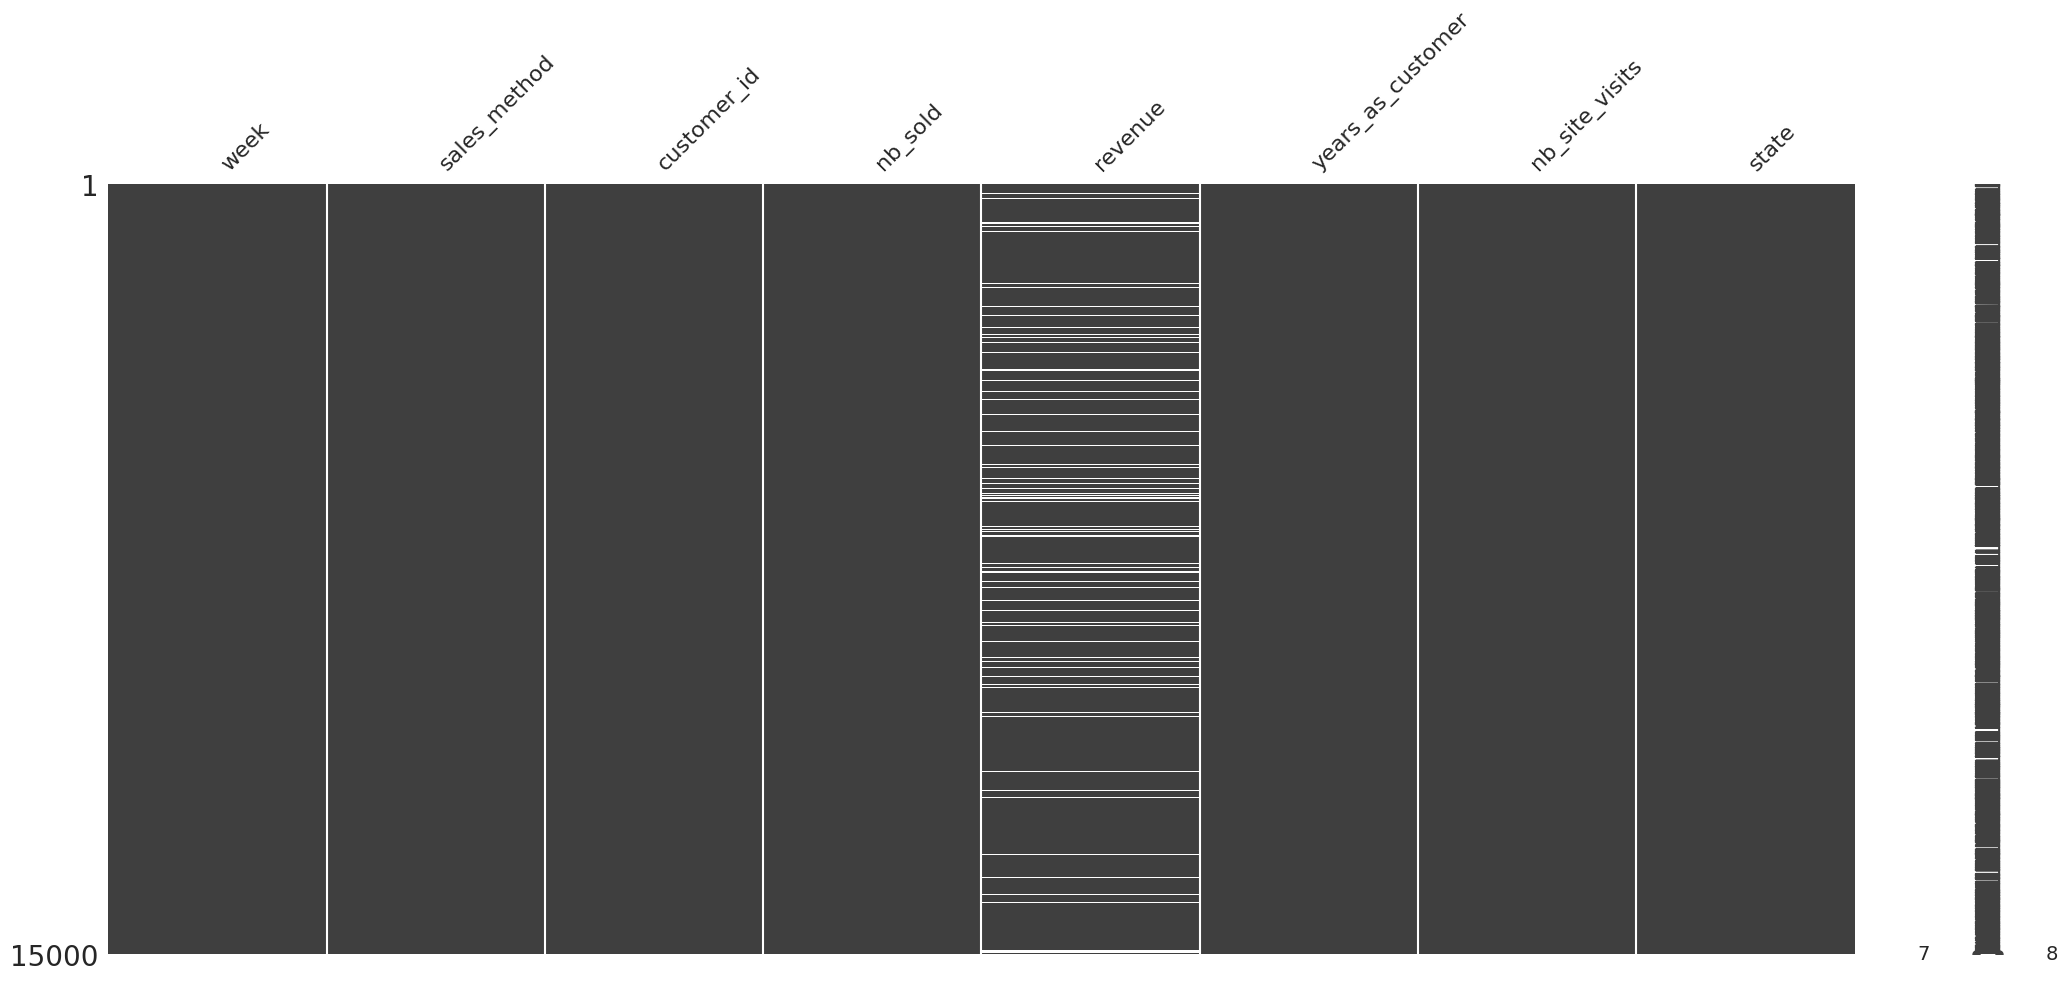

In [88]:
# Visualize the spread of missing values
msno.matrix(df)
plt.show()

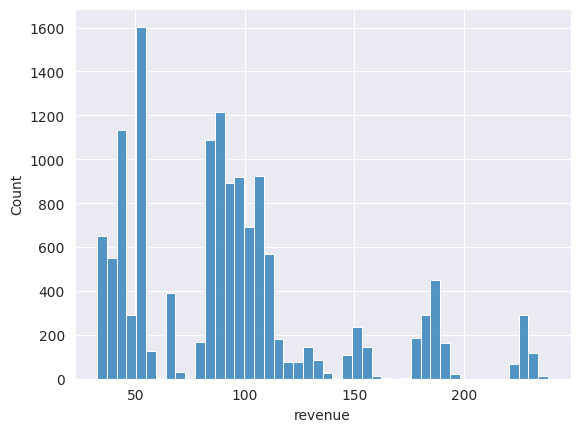

In [89]:
sns.histplot(df['revenue'])
plt.show()

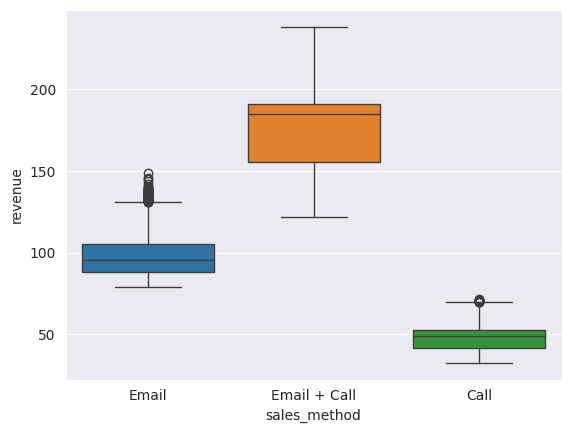

In [90]:
# Visualize distribution across sales methods
sns.boxplot(data=df, x='sales_method', y='revenue', hue='sales_method')
plt.show()

Distribution of revenue vary widely across sales methods

In [91]:
# Fill missing values in each method by the group's median value
revenue_dict = df.groupby("sales_method")["revenue"].median().to_dict()
print(revenue_dict)

{'Call': 49.07, 'Email': 95.58, 'Email + Call': 184.74}


In [92]:
df["revenue"] = df["revenue"].fillna(df["sales_method"].map(revenue_dict))

### Years as customer

In [93]:
# Replace out of range values with 40
df.loc[df['years_as_customer'] > 40, 'years_as_customer'] = 40

In [94]:
(df['years_as_customer'] > 40).sum()

0

In [95]:
# Confirm there are no more missing values
df.isna().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

In [96]:
df.shape

(15000, 8)

## 4. Exploratory Analysis

How many customers were there for each approach?

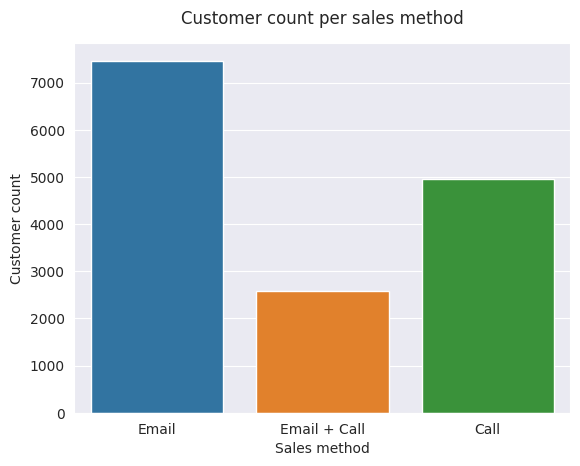

In [97]:
g = sns.countplot(x='sales_method', data=df, hue='sales_method')
g.set(xlabel="Sales method", ylabel="Customer count")
g.set_title("Customer count per sales method", y=1.03)
plt.show()

Majority of the customers bought through email

What does the spread of the revenue look like overall and for each method?

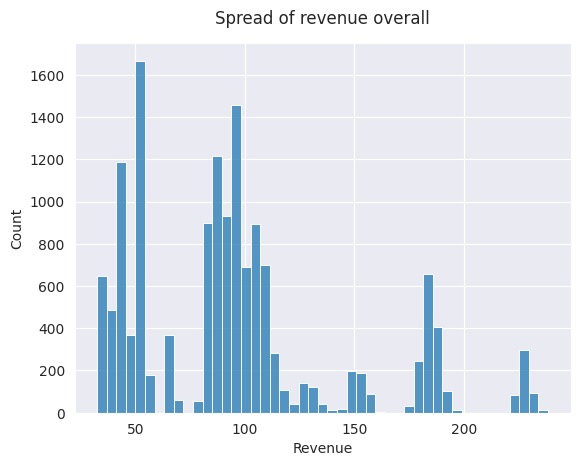

In [98]:
g = sns.histplot(df["revenue"])
g.set(xlabel="Revenue")
g.set_title("Spread of revenue overall", y=1.03)
plt.show()

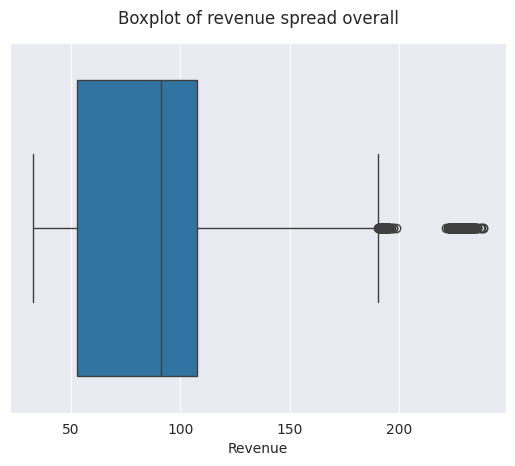

In [99]:
g = sns.boxplot(data=df, x='revenue')
g.set(xlabel="Revenue")
g.set_title("Boxplot of revenue spread overall", y=1.03)
plt.show()

A large portion of the revenue falls between **$50 - 100**.

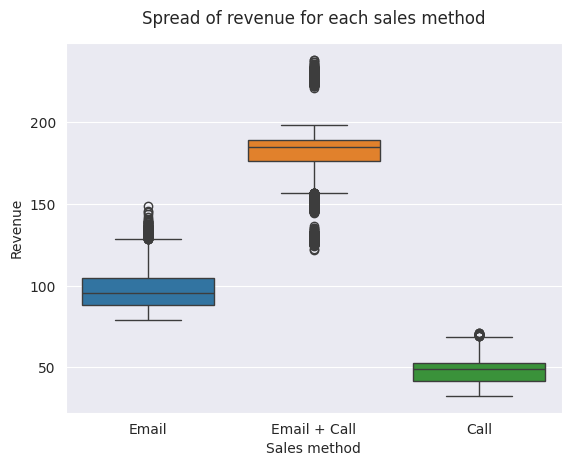

In [100]:
g = sns.boxplot(data=df, x='sales_method', y='revenue', hue='sales_method')
g.set(xlabel="Sales method", ylabel="Revenue")
g.set_title("Spread of revenue for each sales method", y=1.03)
plt.show()

`Email + Call` had a significantly higher distribution of revenue compared to other sales method

In [101]:
df.groupby('sales_method')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
sales_method,,,,,,,,
Call,4962.0,47.651181,8.455884,32.54,41.6300,49.07,52.590,71.36
Email,7466.0,97.014914,10.801764,78.83,88.3900,95.58,104.460,148.97
Email + Call,2572.0,183.798970,27.040536,122.11,176.4375,184.74,189.535,238.32


Was there any difference in revenue over time for each of the methods?

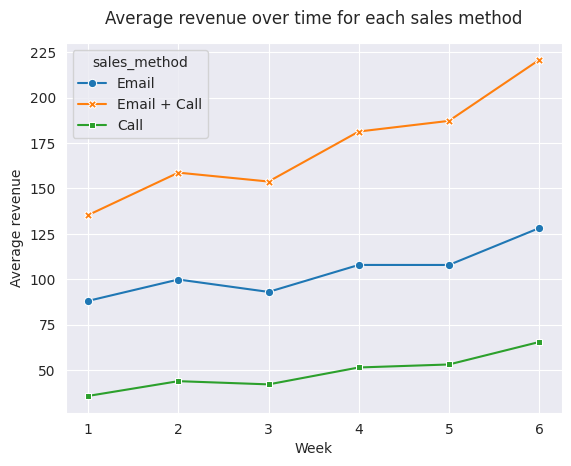

In [102]:
g = sns.lineplot(x='week', y='revenue', data=df, hue='sales_method', errorbar=None,
             style='sales_method', markers=True, dashes=False)
g.set(xlabel="Week", ylabel="Average revenue")
g.set_title("Average revenue over time for each sales method", y=1.03)
plt.show()

Are there any other differences between customers in each group?

Sales week

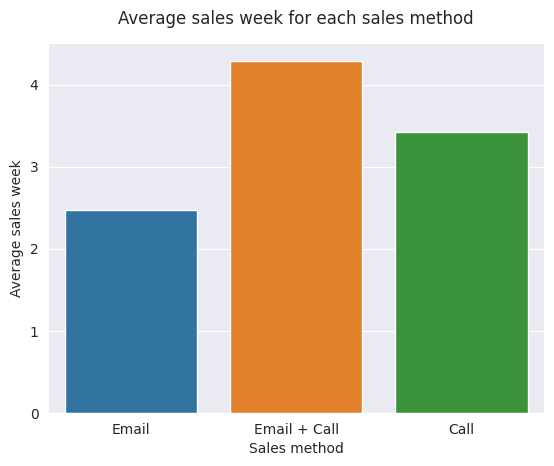

In [103]:
g = sns.barplot(x='sales_method', y='week', data=df, errorbar=None, hue='sales_method')
g.set(xlabel="Sales method", ylabel="Average sales week")
g.set_title("Average sales week for each sales method", y=1.03)
plt.show()

Customers contacted through `Email` responded faster than other sales method, an average of **2.5 weeks**.

Total revenue

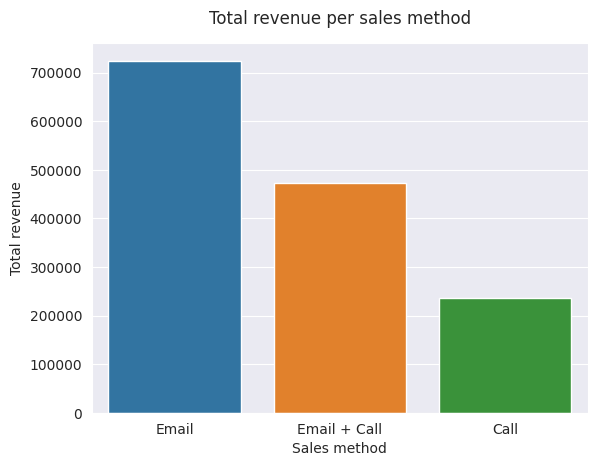

In [104]:
g = sns.barplot(x='sales_method', y='revenue', data=df, estimator='sum', errorbar=None, hue='sales_method')
g.set(xlabel="Sales method", ylabel="Total revenue")
g.set_title("Total revenue per sales method", y=1.03)
plt.show()

`Email` accounted for the largest revenue share (**50.53%**).

In [105]:
df.groupby('sales_method')['revenue'].sum()

sales_method
Call            236445.16
Email           724313.35
Email + Call    472730.95
Name: revenue, dtype: float64

In [106]:
# Calculate the percentage of sales through email
sales_email = df.groupby('sales_method')['revenue'].sum()[1]
sales_email

724313.35

In [107]:
sales_total = df['revenue'].sum()
sales_total

1433489.46

In [108]:
sales_prop_email = (sales_email/sales_total) * 100
sales_prop_email

50.527985744659745

Total quantity sold

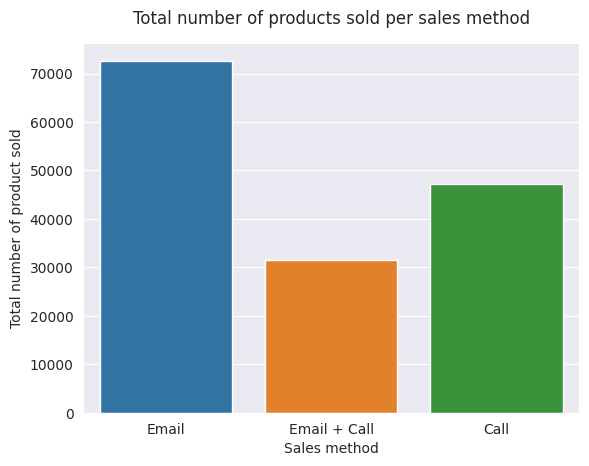

In [109]:
g = sns.barplot(x='sales_method', y='nb_sold', data=df, estimator='sum', errorbar=None, hue='sales_method')
g.set(xlabel="Sales method", ylabel="Total number of product sold")
g.set_title("Total number of products sold per sales method", y=1.03)
plt.show()

`Email` also accounted for close to half (**48.02%**) of the total quantity of products sold.

In [110]:
df.groupby('sales_method')['nb_sold'].sum()

sales_method
Call            47187
Email           72639
Email + Call    31444
Name: nb_sold, dtype: int64

In [111]:
# Calculate the percentage of quantity sold through email
nbsold_email = df.groupby('sales_method')['nb_sold'].sum()[1]
nbsold_email

72639

In [112]:
nbsold_total = df['nb_sold'].sum()
nbsold_total

151270

In [113]:
nbsold_prop_email = (nbsold_email/nbsold_total) * 100
nbsold_prop_email

48.01943544655252